In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

import seaborn as sns
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display


from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

from sklearn.cluster import DBSCAN

In [3]:
plt.rcParams['figure.figsize'] = [6,4]
plt.rcParams['figure.dpi'] = 200
plt.rcParams["axes.grid"] = False

In [4]:
%store -r Newzeleand_2020

In [5]:
Newzeleand_2020

,Unnamed: 0_x,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
29,29,HK Bennett (NZ),3,-,-,-,-,-,-,-,...,199,6,4/64,33.16,6.86,29.0,1,0,0,0
35,35,TA Blundell (NZ),2,2,0,31,22,15.50,35,88.57,...,-,-,-,-,-,-,-,-,1,0
37,37,TA Boult (NZ),1,1,0,5,5,5.00,4,125.00,...,37,0,-,-,3.70,-,0,0,1,0
45,45,MS Chapman (NZ),1,1,0,1,1,1.00,2,50.00,...,-,-,-,-,-,-,-,-,0,0
56,56,C de Grandhomme (NZ),4,4,1,89,58*,29.66,64,139.06,...,134,3,2/54,44.66,4.96,54.0,0,0,3,0
69,69,LH Ferguson (NZ),1,1,0,1,1,1.00,7,14.28,...,60,2,2/60,30.00,6.66,27.0,0,0,0,0
79,79,MJ Guptill (NZ),4,4,0,217,79,54.25,239,90.79,...,-,-,-,-,-,-,-,-,1,0
98,98,KA Jamieson (NZ),2,1,1,25,25*,-,24,104.16,...,95,3,2/42,31.66,4.75,40.0,0,0,2,0
120,120,TWM Latham (NZ),4,4,1,146,69,48.66,136,107.35,...,-,-,-,-,-,-,-,-,3,0
162,162,JDS Neesham (NZ),4,4,0,39,19,9.75,54,72.22,...,198,2,1/50,99.00,6.09,97.5,0,0,0,0


In [6]:
Newzeleand_2020=Newzeleand_2020.reset_index()

In [7]:
Newzeleand_2020

,index,Unnamed: 0_x,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,29,29,HK Bennett (NZ),3,-,-,-,-,-,-,...,199,6,4/64,33.16,6.86,29.0,1,0,0,0
1,35,35,TA Blundell (NZ),2,2,0,31,22,15.50,35,...,-,-,-,-,-,-,-,-,1,0
2,37,37,TA Boult (NZ),1,1,0,5,5,5.00,4,...,37,0,-,-,3.70,-,0,0,1,0
3,45,45,MS Chapman (NZ),1,1,0,1,1,1.00,2,...,-,-,-,-,-,-,-,-,0,0
4,56,56,C de Grandhomme (NZ),4,4,1,89,58*,29.66,64,...,134,3,2/54,44.66,4.96,54.0,0,0,3,0
5,69,69,LH Ferguson (NZ),1,1,0,1,1,1.00,7,...,60,2,2/60,30.00,6.66,27.0,0,0,0,0
6,79,79,MJ Guptill (NZ),4,4,0,217,79,54.25,239,...,-,-,-,-,-,-,-,-,1,0
7,98,98,KA Jamieson (NZ),2,1,1,25,25*,-,24,...,95,3,2/42,31.66,4.75,40.0,0,0,2,0
8,120,120,TWM Latham (NZ),4,4,1,146,69,48.66,136,...,-,-,-,-,-,-,-,-,3,0
9,162,162,JDS Neesham (NZ),4,4,0,39,19,9.75,54,...,198,2,1/50,99.00,6.09,97.5,0,0,0,0


In [8]:
Newzeleand_2020.drop(['index','Unnamed: 0_x'],inplace=True,axis=1)

In [9]:
Newzeleand_2020

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,HK Bennett (NZ),3,-,-,-,-,-,-,-,-,...,199,6,4/64,33.16,6.86,29.0,1,0,0,0
1,TA Blundell (NZ),2,2,0,31,22,15.50,35,88.57,0,...,-,-,-,-,-,-,-,-,1,0
2,TA Boult (NZ),1,1,0,5,5,5.00,4,125.00,0,...,37,0,-,-,3.70,-,0,0,1,0
3,MS Chapman (NZ),1,1,0,1,1,1.00,2,50.00,0,...,-,-,-,-,-,-,-,-,0,0
4,C de Grandhomme (NZ),4,4,1,89,58*,29.66,64,139.06,0,...,134,3,2/54,44.66,4.96,54.0,0,0,3,0
5,LH Ferguson (NZ),1,1,0,1,1,1.00,7,14.28,0,...,60,2,2/60,30.00,6.66,27.0,0,0,0,0
6,MJ Guptill (NZ),4,4,0,217,79,54.25,239,90.79,0,...,-,-,-,-,-,-,-,-,1,0
7,KA Jamieson (NZ),2,1,1,25,25*,-,24,104.16,0,...,95,3,2/42,31.66,4.75,40.0,0,0,2,0
8,TWM Latham (NZ),4,4,1,146,69,48.66,136,107.35,0,...,-,-,-,-,-,-,-,-,3,0
9,JDS Neesham (NZ),4,4,0,39,19,9.75,54,72.22,0,...,198,2,1/50,99.00,6.09,97.5,0,0,0,0


In [10]:
Newzeleand_2020_players =Newzeleand_2020.copy()

In [11]:
Newzeleand_2020_players.drop('Player',axis=1,inplace=True)

In [12]:
Newzeleand_2020_players.HS=Newzeleand_2020_players.HS.str.extract('(\d+)')
Newzeleand_2020_players['HS'].fillna(value=0, inplace=True)


In [13]:
Newzeleand_2020_players

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,3,-,-,-,0,-,-,-,-,-,...,199,6,4/64,33.16,6.86,29.0,1,0,0,0
1,2,2,0,31,22,15.50,35,88.57,0,0,...,-,-,-,-,-,-,-,-,1,0
2,1,1,0,5,5,5.00,4,125.00,0,0,...,37,0,-,-,3.70,-,0,0,1,0
3,1,1,0,1,1,1.00,2,50.00,0,0,...,-,-,-,-,-,-,-,-,0,0
4,4,4,1,89,58,29.66,64,139.06,0,1,...,134,3,2/54,44.66,4.96,54.0,0,0,3,0
5,1,1,0,1,1,1.00,7,14.28,0,0,...,60,2,2/60,30.00,6.66,27.0,0,0,0,0
6,4,4,0,217,79,54.25,239,90.79,0,2,...,-,-,-,-,-,-,-,-,1,0
7,2,1,1,25,25,-,24,104.16,0,0,...,95,3,2/42,31.66,4.75,40.0,0,0,2,0
8,4,4,1,146,69,48.66,136,107.35,0,1,...,-,-,-,-,-,-,-,-,3,0
9,4,4,0,39,19,9.75,54,72.22,0,0,...,198,2,1/50,99.00,6.09,97.5,0,0,0,0


In [14]:
Newzeleand_2020_players.replace("-",0,inplace=True)

In [15]:
Newzeleand_2020_players.drop('BBI',axis=1,inplace=True)

In [16]:
scaler = StandardScaler()

Newzeleand_2020_players_scaled = pd.DataFrame(scaler.fit_transform(Newzeleand_2020_players),columns=Newzeleand_2020_players.columns)
Newzeleand_2020_players_scaled.shape
Newzeleand_2020_players_scaled.head()

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
0,0.218218,-1.566699,-0.718185,-0.840317,-0.969107,-0.840034,-0.829778,-2.109178,-0.258199,-0.621150,...,1.179324,1.677491,2.343773,0.318631,1.264013,0.128635,3.872983,0.0,-1.068103,0.0
1,-0.654654,-0.174078,-0.718185,-0.441468,-0.314355,-0.270161,-0.415259,0.240244,-0.258199,-0.621150,...,-0.536056,-0.931757,-0.870544,-0.802187,-1.093874,-0.789619,-0.258199,0.0,-0.118678,0.0
2,-1.527525,-0.870388,-0.718185,-0.775987,-0.820299,-0.656204,-0.782404,1.206592,-0.258199,-0.621150,...,-0.536056,-0.446621,-0.870544,-0.802187,0.177873,-0.789619,-0.258199,0.0,-0.118678,0.0
3,-1.527525,-0.870388,-0.718185,-0.827451,-0.939345,-0.803268,-0.806091,-0.782870,-0.258199,-0.621150,...,-0.536056,-0.931757,-0.870544,-0.802187,-1.093874,-0.789619,-0.258199,0.0,-1.068103,0.0
4,1.091089,1.218544,0.923381,0.304766,0.757056,0.250445,-0.071801,1.579550,-0.258199,0.798621,...,1.179324,0.825224,0.736614,0.707335,0.610954,0.920233,-0.258199,0.0,1.780172,0.0


In [17]:
Newzeleand_2020_players_scaled.describe()

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
count,1.600000e+01,1.600000e+01,1.600000e+01,1.600000e+01,1.600000e+01,1.600000e+01,1.600000e+01,1.600000e+01,1.600000e+01,1.600000e+01,...,1.600000e+01,1.600000e+01,16.000000,1.600000e+01,16.000000,1.600000e+01,1.600000e+01,16.0,16.000000,16.0
mean,1.387779e-17,-3.122502e-17,-2.775558e-17,-2.428613e-17,2.775558e-17,8.239937e-17,-2.949030e-17,-5.377643e-17,7.632783e-17,2.775558e-17,...,1.387779e-17,1.387779e-17,0.000000,-9.714451e-17,0.000000,-1.387779e-17,8.326673e-17,0.0,0.000000,0.0
std,1.032796e+00,1.032796e+00,1.032796e+00,1.032796e+00,1.032796e+00,1.032796e+00,1.032796e+00,1.032796e+00,1.032796e+00,1.032796e+00,...,1.032796e+00,1.032796e+00,1.032796,1.032796e+00,1.032796,1.032796e+00,1.032796e+00,0.0,1.032796,0.0
min,-1.527525e+00,-1.566699e+00,-7.181848e-01,-8.403170e-01,-9.691065e-01,-8.400341e-01,-8.297780e-01,-2.109178e+00,-2.581989e-01,-6.211496e-01,...,-5.360563e-01,-9.317572e-01,-0.870544,-8.021874e-01,-1.093874,-7.896192e-01,-2.581989e-01,0.0,-1.068103,0.0
25%,-6.546537e-01,-8.703883e-01,-7.181848e-01,-7.824196e-01,-8.351801e-01,-8.032681e-01,-7.202266e-01,-3.467799e-01,-2.581989e-01,-6.211496e-01,...,-5.360563e-01,-9.317572e-01,-0.870544,-8.021874e-01,-1.093874,-7.896192e-01,-2.581989e-01,0.0,-1.068103,0.0
50%,2.182179e-01,-1.740777e-01,-7.181848e-01,-4.736332e-01,-3.589972e-01,-3.758634e-01,-4.744761e-01,2.260527e-01,-2.581989e-01,-6.211496e-01,...,-5.360563e-01,-2.958350e-01,-0.334825,-4.726342e-01,0.358323,-5.046439e-01,-2.581989e-01,0.0,-0.118678,0.0
75%,1.091089e+00,1.218544e+00,9.233805e-01,4.881076e-01,8.389003e-01,4.250838e-01,1.413806e-01,6.749417e-01,-2.581989e-01,7.986209e-01,...,-1.072113e-01,8.809490e-01,0.736614,4.158074e-01,1.023412,5.046439e-01,-2.581989e-01,0.0,0.830747,0.0
max,1.091089e+00,1.218544e+00,2.564946e+00,1.951626e+00,2.274889e+00,2.799799e+00,2.320566e+00,1.579550e+00,3.872983e+00,2.218391e+00,...,2.894704e+00,1.677491e+00,2.343773,2.544045e+00,1.264013,2.297614e+00,3.872983e+00,0.0,1.780172,0.0


In [18]:
X =  Newzeleand_2020_players_scaled.iloc[:,:].values

In [19]:
X

array([[ 0.21821789, -1.5666989 , -0.71818485, -0.84031701, -0.96910653,
        -0.84003406, -0.82977801, -2.10917844, -0.25819889, -0.62114956,
         0.        , -0.79205069, -0.64699664, -1.26356743,  0.21821789,
         1.04257207,  1.29732137,  1.17932379,  1.67749077,  2.34377336,
         0.31863147,  1.26401302,  0.12863471,  3.87298335,  0.        ,
        -1.06810349,  0.        ],
       [-0.65465367, -0.17407766, -0.71818485, -0.44146798, -0.31435509,
        -0.27016113, -0.41525911,  0.24024418, -0.25819889, -0.62114956,
         0.        , -0.28001792, -0.64699664, -1.1844915 , -0.65465367,
        -0.9591663 , -0.96823044, -0.53605627, -0.93175721, -0.87054439,
        -0.80218742, -1.09387394, -0.78961924, -0.25819889,  0.        ,
        -0.11867817,  0.        ],
       [-1.52752523, -0.87038828, -0.71818485, -0.77598652, -0.82029939,
        -0.65620408, -0.78240442,  1.20659244, -0.25819889, -0.62114956,
         0.        , -0.6640425 , -0.64699664, -1.1581

In [20]:
"""from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)"""

'from sklearn.cross_validation import train_test_split\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)'

In [21]:
"""from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)"""

'from sklearn.preprocessing import StandardScaler\nsc_X = StandardScaler()\nX_train = sc_X.fit_transform(X_train)\nX_test = sc_X.transform(X_test)\nsc_y = StandardScaler()\ny_train = sc_y.fit_transform(y_train)'

In [22]:
np.any(np.isnan(Newzeleand_2020_players_scaled))

False

In [23]:
Newzeleand_2020_players_scaled

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
0,0.218218,-1.566699,-0.718185,-0.840317,-0.969107,-0.840034,-0.829778,-2.109178,-0.258199,-0.621150,...,1.179324,1.677491,2.343773,0.318631,1.264013,0.128635,3.872983,0.0,-1.068103,0.0
1,-0.654654,-0.174078,-0.718185,-0.441468,-0.314355,-0.270161,-0.415259,0.240244,-0.258199,-0.621150,...,-0.536056,-0.931757,-0.870544,-0.802187,-1.093874,-0.789619,-0.258199,0.0,-0.118678,0.0
2,-1.527525,-0.870388,-0.718185,-0.775987,-0.820299,-0.656204,-0.782404,1.206592,-0.258199,-0.621150,...,-0.536056,-0.446621,-0.870544,-0.802187,0.177873,-0.789619,-0.258199,0.0,-0.118678,0.0
3,-1.527525,-0.870388,-0.718185,-0.827451,-0.939345,-0.803268,-0.806091,-0.782870,-0.258199,-0.621150,...,-0.536056,-0.931757,-0.870544,-0.802187,-1.093874,-0.789619,-0.258199,0.0,-1.068103,0.0
4,1.091089,1.218544,0.923381,0.304766,0.757056,0.250445,-0.071801,1.579550,-0.258199,0.798621,...,1.179324,0.825224,0.736614,0.707335,0.610954,0.920233,-0.258199,0.0,1.780172,0.0
5,-1.527525,-0.870388,-0.718185,-0.827451,-0.939345,-0.803268,-0.746874,-1.730385,-0.258199,-0.621150,...,-0.536056,-0.145049,0.200895,0.211822,1.195270,0.065307,-0.258199,0.0,-1.068103,0.0
6,1.091089,1.218544,-0.718185,1.951626,1.382046,1.154521,2.000794,0.299132,-0.258199,2.218391,...,-0.536056,-0.931757,-0.870544,-0.802187,-1.093874,-0.789619,-0.258199,0.0,-0.118678,0.0
7,-0.654654,-0.870388,0.923381,-0.518665,-0.225071,-0.840034,-0.545536,0.653787,-0.258199,-0.621150,...,1.179324,0.313864,0.736614,0.267931,0.538774,0.476938,-0.258199,0.0,0.830747,0.0
8,1.091089,1.218544,0.923381,1.038133,1.084432,0.948999,0.780924,0.738406,-0.258199,0.798621,...,-0.536056,-0.931757,-0.870544,-0.802187,-1.093874,-0.789619,-0.258199,0.0,1.780172,0.0
9,1.091089,1.218544,-0.718185,-0.338539,-0.403639,-0.481566,-0.190235,-0.193459,-0.258199,-0.621150,...,-0.536056,1.664379,0.200895,2.544045,0.999352,2.297614,-0.258199,0.0,-1.068103,0.0


In [24]:
np.all(np.isfinite(Newzeleand_2020_players_scaled))

True

K:\4th year\my research practical\jupyter\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


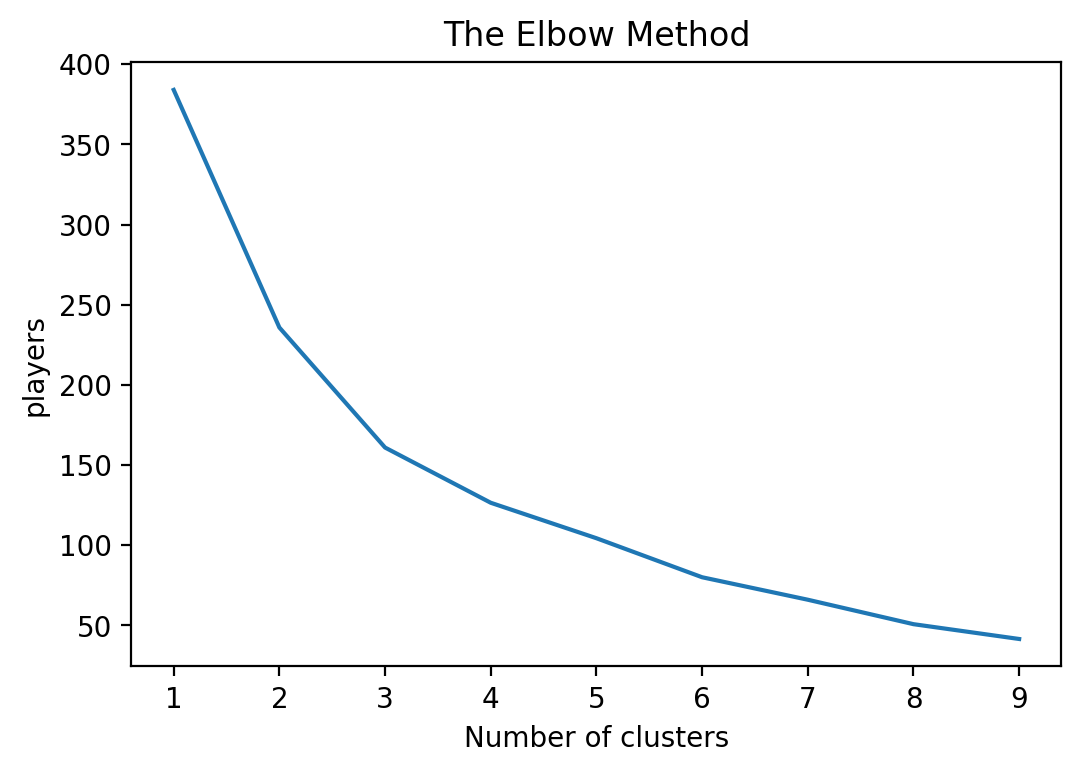

In [25]:
from sklearn.cluster import KMeans
players = []
for i in range(1,10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    players.append(kmeans.inertia_)
plt.plot(range(1, 10), players)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('players')
plt.show()

In [26]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)


In [27]:
y_kmeans

array([1, 2, 2, 2, 1, 2, 0, 1, 0, 1, 0, 1, 1, 1, 0, 2])

In [28]:
kmeans.cluster_centers_

array([[ 1.09108945,  1.21854359,  0.51298918,  1.6364068 ,  1.53829386,
         1.49607729,  1.60700095,  0.44728091,  0.77459667,  1.50850607,
         0.        ,  1.57610087,  1.07832773,  0.29818214,  1.09108945,
        -0.9591663 , -0.96823044, -0.53605627, -0.93175721, -0.87054439,
        -0.80218742, -1.09387394, -0.78961924, -0.25819889,  0.        ,
         0.83074716,  0.        ],
       [ 0.21821789, -0.2735506 ,  0.2198525 , -0.48006627, -0.40363938,
        -0.48072524, -0.50323863, -0.07446985, -0.25819889, -0.41832521,
         0.        , -0.49946054, -0.15404682,  0.18804067,  0.21821789,
         1.04257207,  1.03282099,  0.6892152 ,  1.01628148,  0.96620861,
         0.88652527,  0.89771071,  0.89309244,  0.33197   ,  0.        ,
         0.01695402,  0.        ],
       [-1.17837661, -0.59186403, -0.71818485, -0.63703266, -0.66553996,
        -0.5238465 , -0.58106667, -0.25356695, -0.25819889, -0.62114956,
         0.        , -0.56163595, -0.64699664, -0.5018

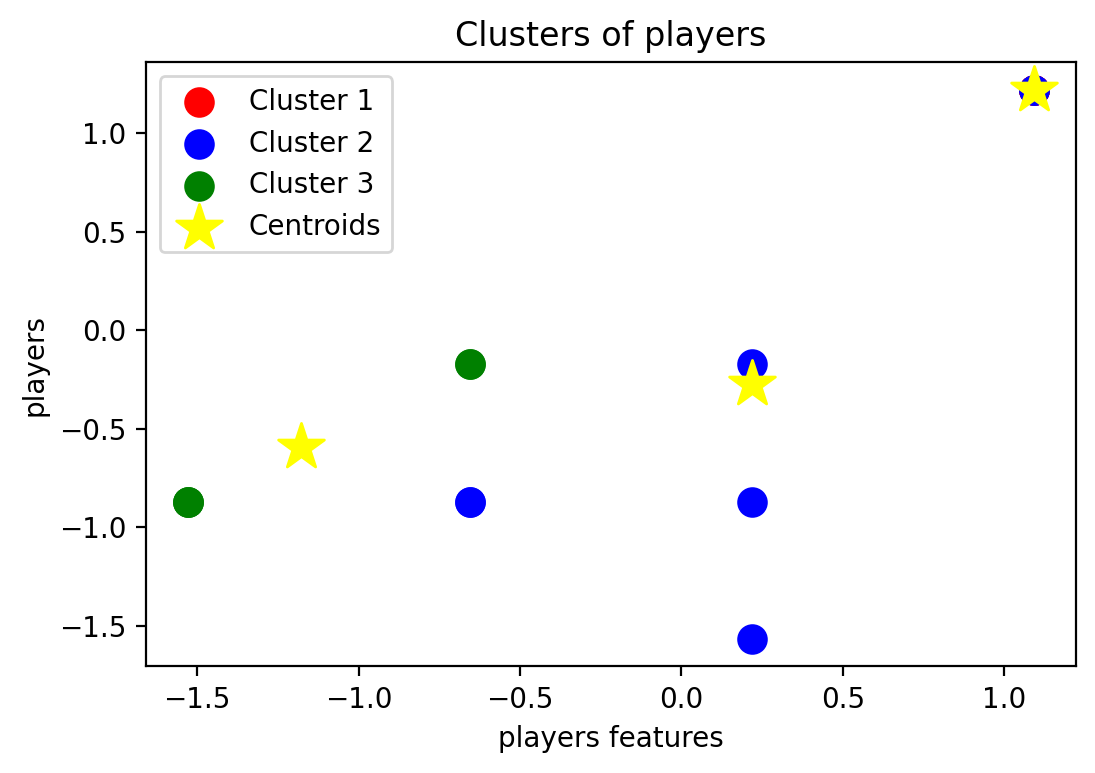

In [29]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300,marker='*', c = 'yellow', label = 'Centroids')
plt.title('Clusters of players')
plt.xlabel('players features')
plt.ylabel('players')
plt.legend()
plt.show()

In [30]:
Newzeleand_2020

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,HK Bennett (NZ),3,-,-,-,-,-,-,-,-,...,199,6,4/64,33.16,6.86,29.0,1,0,0,0
1,TA Blundell (NZ),2,2,0,31,22,15.50,35,88.57,0,...,-,-,-,-,-,-,-,-,1,0
2,TA Boult (NZ),1,1,0,5,5,5.00,4,125.00,0,...,37,0,-,-,3.70,-,0,0,1,0
3,MS Chapman (NZ),1,1,0,1,1,1.00,2,50.00,0,...,-,-,-,-,-,-,-,-,0,0
4,C de Grandhomme (NZ),4,4,1,89,58*,29.66,64,139.06,0,...,134,3,2/54,44.66,4.96,54.0,0,0,3,0
5,LH Ferguson (NZ),1,1,0,1,1,1.00,7,14.28,0,...,60,2,2/60,30.00,6.66,27.0,0,0,0,0
6,MJ Guptill (NZ),4,4,0,217,79,54.25,239,90.79,0,...,-,-,-,-,-,-,-,-,1,0
7,KA Jamieson (NZ),2,1,1,25,25*,-,24,104.16,0,...,95,3,2/42,31.66,4.75,40.0,0,0,2,0
8,TWM Latham (NZ),4,4,1,146,69,48.66,136,107.35,0,...,-,-,-,-,-,-,-,-,3,0
9,JDS Neesham (NZ),4,4,0,39,19,9.75,54,72.22,0,...,198,2,1/50,99.00,6.09,97.5,0,0,0,0


In [31]:
Newzeleand_2020["cluster"] = y_kmeans

In [32]:
Newzeleand_2020

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St,cluster
0,HK Bennett (NZ),3,-,-,-,-,-,-,-,-,...,6,4/64,33.16,6.86,29.0,1,0,0,0,1
1,TA Blundell (NZ),2,2,0,31,22,15.50,35,88.57,0,...,-,-,-,-,-,-,-,1,0,2
2,TA Boult (NZ),1,1,0,5,5,5.00,4,125.00,0,...,0,-,-,3.70,-,0,0,1,0,2
3,MS Chapman (NZ),1,1,0,1,1,1.00,2,50.00,0,...,-,-,-,-,-,-,-,0,0,2
4,C de Grandhomme (NZ),4,4,1,89,58*,29.66,64,139.06,0,...,3,2/54,44.66,4.96,54.0,0,0,3,0,1
5,LH Ferguson (NZ),1,1,0,1,1,1.00,7,14.28,0,...,2,2/60,30.00,6.66,27.0,0,0,0,0,2
6,MJ Guptill (NZ),4,4,0,217,79,54.25,239,90.79,0,...,-,-,-,-,-,-,-,1,0,0
7,KA Jamieson (NZ),2,1,1,25,25*,-,24,104.16,0,...,3,2/42,31.66,4.75,40.0,0,0,2,0,1
8,TWM Latham (NZ),4,4,1,146,69,48.66,136,107.35,0,...,-,-,-,-,-,-,-,3,0,0
9,JDS Neesham (NZ),4,4,0,39,19,9.75,54,72.22,0,...,2,1/50,99.00,6.09,97.5,0,0,0,0,1


In [33]:
Newzeleand_2020['cluster'].value_counts()

1    7
2    5
0    4
Name: cluster, dtype: int64

In [34]:
Newzeleand_Cluster_2020 = np.array([4,7,5])

In [35]:
Newzeleand_Cluster_2020

array([4, 7, 5])

In [36]:
%store Newzeleand_Cluster_2020

Stored 'Newzeleand_Cluster_2020' (ndarray)


In [37]:
Newzeleand_2020_players_scaled.insert(0, 'Player', Newzeleand_2020.Player)

In [38]:
Newzeleand_2020_players_scaled

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
0,HK Bennett (NZ),0.218218,-1.566699,-0.718185,-0.840317,-0.969107,-0.840034,-0.829778,-2.109178,-0.258199,...,1.179324,1.677491,2.343773,0.318631,1.264013,0.128635,3.872983,0.0,-1.068103,0.0
1,TA Blundell (NZ),-0.654654,-0.174078,-0.718185,-0.441468,-0.314355,-0.270161,-0.415259,0.240244,-0.258199,...,-0.536056,-0.931757,-0.870544,-0.802187,-1.093874,-0.789619,-0.258199,0.0,-0.118678,0.0
2,TA Boult (NZ),-1.527525,-0.870388,-0.718185,-0.775987,-0.820299,-0.656204,-0.782404,1.206592,-0.258199,...,-0.536056,-0.446621,-0.870544,-0.802187,0.177873,-0.789619,-0.258199,0.0,-0.118678,0.0
3,MS Chapman (NZ),-1.527525,-0.870388,-0.718185,-0.827451,-0.939345,-0.803268,-0.806091,-0.782870,-0.258199,...,-0.536056,-0.931757,-0.870544,-0.802187,-1.093874,-0.789619,-0.258199,0.0,-1.068103,0.0
4,C de Grandhomme (NZ),1.091089,1.218544,0.923381,0.304766,0.757056,0.250445,-0.071801,1.579550,-0.258199,...,1.179324,0.825224,0.736614,0.707335,0.610954,0.920233,-0.258199,0.0,1.780172,0.0
5,LH Ferguson (NZ),-1.527525,-0.870388,-0.718185,-0.827451,-0.939345,-0.803268,-0.746874,-1.730385,-0.258199,...,-0.536056,-0.145049,0.200895,0.211822,1.195270,0.065307,-0.258199,0.0,-1.068103,0.0
6,MJ Guptill (NZ),1.091089,1.218544,-0.718185,1.951626,1.382046,1.154521,2.000794,0.299132,-0.258199,...,-0.536056,-0.931757,-0.870544,-0.802187,-1.093874,-0.789619,-0.258199,0.0,-0.118678,0.0
7,KA Jamieson (NZ),-0.654654,-0.870388,0.923381,-0.518665,-0.225071,-0.840034,-0.545536,0.653787,-0.258199,...,1.179324,0.313864,0.736614,0.267931,0.538774,0.476938,-0.258199,0.0,0.830747,0.0
8,TWM Latham (NZ),1.091089,1.218544,0.923381,1.038133,1.084432,0.948999,0.780924,0.738406,-0.258199,...,-0.536056,-0.931757,-0.870544,-0.802187,-1.093874,-0.789619,-0.258199,0.0,1.780172,0.0
9,JDS Neesham (NZ),1.091089,1.218544,-0.718185,-0.338539,-0.403639,-0.481566,-0.190235,-0.193459,-0.258199,...,-0.536056,1.664379,0.200895,2.544045,0.999352,2.297614,-0.258199,0.0,-1.068103,0.0


In [39]:
Newzeleand_2020_players_scaled[['Player','Ave_x','Ave_y']]

,Player,Ave_x,Ave_y
0,HK Bennett (NZ),-0.840034,0.318631
1,TA Blundell (NZ),-0.270161,-0.802187
2,TA Boult (NZ),-0.656204,-0.802187
3,MS Chapman (NZ),-0.803268,-0.802187
4,C de Grandhomme (NZ),0.250445,0.707335
5,LH Ferguson (NZ),-0.803268,0.211822
6,MJ Guptill (NZ),1.154521,-0.802187
7,KA Jamieson (NZ),-0.840034,0.267931
8,TWM Latham (NZ),0.948999,-0.802187
9,JDS Neesham (NZ),-0.481566,2.544045


In [40]:
Newzeleand_2020_Ave=Newzeleand_2020_players_scaled.mean()

In [41]:
Newzeleand_2020_Ave

Mat_x           1.387779e-17
Inns_x         -3.122502e-17
NO             -2.775558e-17
Runs_x         -2.428613e-17
HS              2.775558e-17
Ave_x           8.239937e-17
BF             -2.949030e-17
SR_x           -5.377643e-17
100             7.632783e-17
50              2.775558e-17
0               0.000000e+00
4s              6.938894e-18
6s              2.081668e-17
Unnamed: 0_y   -1.110223e-16
Mat_y           1.387779e-17
Inns_y         -1.387779e-17
Overs          -5.551115e-17
Mdns            1.387779e-17
Runs_y          1.387779e-17
Wkts            0.000000e+00
Ave_y          -9.714451e-17
Econ            0.000000e+00
SR_y           -1.387779e-17
4               8.326673e-17
5               0.000000e+00
Ct              0.000000e+00
St              0.000000e+00
dtype: float64

In [42]:
Newzeleand_Ave_2020 =Newzeleand_2020_Ave[['Ave_x','Ave_y']]

In [43]:
Newzeleand_Ave_2020

Ave_x    8.239937e-17
Ave_y   -9.714451e-17
dtype: float64

In [44]:
Newzeleand_Ave_2020 = np.array([Newzeleand_Ave_2020.Ave_x, Newzeleand_Ave_2020.Ave_y])

In [45]:
Newzeleand_Ave_2020

array([ 8.23993651e-17, -9.71445147e-17])

In [46]:
%store Newzeleand_Ave_2020

Stored 'Newzeleand_Ave_2020' (ndarray)


In [47]:
Newzeleand_2020

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St,cluster
0,HK Bennett (NZ),3,-,-,-,-,-,-,-,-,...,6,4/64,33.16,6.86,29.0,1,0,0,0,1
1,TA Blundell (NZ),2,2,0,31,22,15.50,35,88.57,0,...,-,-,-,-,-,-,-,1,0,2
2,TA Boult (NZ),1,1,0,5,5,5.00,4,125.00,0,...,0,-,-,3.70,-,0,0,1,0,2
3,MS Chapman (NZ),1,1,0,1,1,1.00,2,50.00,0,...,-,-,-,-,-,-,-,0,0,2
4,C de Grandhomme (NZ),4,4,1,89,58*,29.66,64,139.06,0,...,3,2/54,44.66,4.96,54.0,0,0,3,0,1
5,LH Ferguson (NZ),1,1,0,1,1,1.00,7,14.28,0,...,2,2/60,30.00,6.66,27.0,0,0,0,0,2
6,MJ Guptill (NZ),4,4,0,217,79,54.25,239,90.79,0,...,-,-,-,-,-,-,-,1,0,0
7,KA Jamieson (NZ),2,1,1,25,25*,-,24,104.16,0,...,3,2/42,31.66,4.75,40.0,0,0,2,0,1
8,TWM Latham (NZ),4,4,1,146,69,48.66,136,107.35,0,...,-,-,-,-,-,-,-,3,0,0
9,JDS Neesham (NZ),4,4,0,39,19,9.75,54,72.22,0,...,2,1/50,99.00,6.09,97.5,0,0,0,0,1
